In [2]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [3]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201114_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [4]:
import pandas as pd

In [5]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [6]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114', 'main_result_separatebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
# if True:
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
            'multi_path': True,
            'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201114_generator(with_source=True, separate_bn_list=[True]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=False,
        key_override={
            'model_prefix': 'maskcnn_polished_with_rcnn_k_bl.20201114_with_OOM',
        }
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [7]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           inst-avg     1280              0.350576   
                                                                                                  2560              0.558616   
                                                                                                  5120              0.586434   
                                                                                     inst-last    1280              0.357868   
                                                                                                  2560              0.546941   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560              0.637329   
                                                                                                  5120              0.679273   
                                                                                     inst-last    1280              0.414699   
                                                                                                  2560              0.594899   
                                                                                                  5120              0.667413   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           inst-avg     1280           0.168462   
                                                                                                  2560           0.260298   
                                                                                                  5120           0.271654   
                                                                                     inst-last    1280           0.172353   
                                                                                                  2560           0.255302   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560           0.294164   
                                                                                                  5120           0.312190   
                                                                                     inst-last    1280           0.197021   
                                                                                                  2560           0.276591   
                                                                                                  5120           0.307430   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           inst-avg     1280          0.374049   
                                                                                                  2560          0.487760   
                                                                                                  5120          0.501785   
                                                                                     inst-last    1280          0.380795   
                                                                           

In [8]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

In [9]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [10]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           2           inst-avg     1280                  0.387379   
                                                                                                  2560                  0.554580   
                                                                                                  5120                  0.593818   
                                                                                     inst-last    1280                  0.458152   
                                                                                                  2560                  0.557418   
...                                                                                                                          ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560                  0.639769   
                                                                                                  5120                  0.673392   
                                                                                     inst-last    1280                  0.568706   
                                                                                                  2560                  0.626743   
                                                                                                  5120                  0.663524   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           2           inst-avg     1280               0.184740   
                                                                                                  2560               0.258953   
                                                                                                  5120               0.274708   
                                                                                     inst-last    1280               0.215354   
                                                                                                  2560               0.259864   
...                                                                                                                       ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560               0.294604   
                                                                                                  5120               0.309649   
                                                                                     inst-last    1280               0.263007   
                                                                                                  2560               0.289067   
                                                                                                  5120               0.304765   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           inst-avg     1280              0.396127   
                                                                                                  2560              0.487776   
                                                                                                  5120              0.505647   
                                                                           

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

from scipy.stats import pearsonr

1280
2560
5120


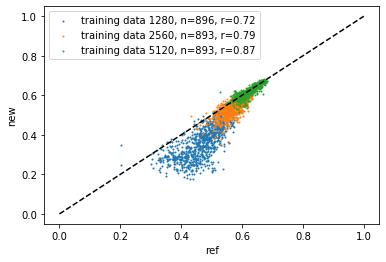

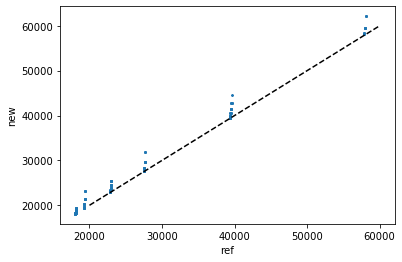

inst-avg
inst-last


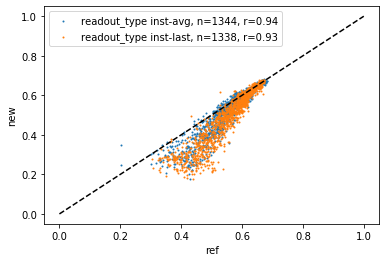

In [19]:
def plot_scatter():
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('train_keep').unique():
        b = aaaa.xs(train_keep, level='train_keep')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='training data {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    # show param size change
    fig, ax = plt.subplots(squeeze=True)
    ax.scatter(b['num_param_ref'].values, b['num_param_new'].values, s=1)
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([20000, 60000], [20000, 60000],linestyle='--',color='k')
    plt.show()
    
    
    # show readout type
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('readout_type').unique():
        b = aaaa.xs(train_keep, level='readout_type')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='readout_type {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    
plot_scatter()

In [20]:
from scipy.stats import pearsonr
pearsonr(aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values)

(0.9299431471338458, 0.0)

In [14]:
df_main_result[df_main_result.isnull().any(axis=1)].index.get_level_values('rcnn_bl_cls').value_counts()
# high count models have OOM.

7    358
6    224
5    144
4     48
Name: rcnn_bl_cls, dtype: int64